# Contents
### 01. Importing libraries and data
### 02. Data cleaning - COVID Deaths
### 03. Data prep for regression analysis - Pneumonia vs. COVID
### 04. Regression analysis - Pneumonia vs. COVID

# 01. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# create path to import data
path = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project'

In [5]:
# import COVID deaths data
df_covid_deaths = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','COVID_deaths_wrangled_cleaned.csv'), index_col = False)

In [6]:
# import contributing conditions data
df_conditions = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','Contributing_conditions_wrangled_cleaned.csv'), index_col = False)

# 02. Data cleaning - COVID Deaths

In [7]:
df_covid_deaths.columns

Index(['Year', 'Month', 'State', 'Age Group', 'Footnote', 'COVID-19 Deaths',
       'Total Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
       'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

In [8]:
df_covid_deaths.head(20)

,Year,Month,State,Age Group,Footnote,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020,1,Alabama,All Ages,One or more data cells have counts between 1-9...,4,4729,282,0,35,318
1,2020,1,Alabama,Under 1 year,NaN,0,31,0,0,0,0
2,2020,1,Alabama,1-4 years,One or more data cells have counts between 1-9...,0,12,4,0,0,4
3,2020,1,Alabama,5-14 years,One or more data cells have counts between 1-9...,0,16,4,0,0,4
4,2020,1,Alabama,15-24 years,One or more data cells have counts between 1-9...,0,56,0,0,4,4
5,2020,1,Alabama,25-34 years,One or more data cells have counts between 1-9...,0,77,4,0,0,4
6,2020,1,Alabama,35-44 years,One or more data cells have counts between 1-9...,0,132,4,0,4,4
7,2020,1,Alabama,45-54 years,One or more data cells have counts between 1-9...,0,297,18,0,4,21
8,2020,1,Alabama,55-64 years,One or more data cells have counts between 1-9...,4,719,41,0,11,53
9,2020,1,Alabama,65-74 years,NaN,0,1034,64,0,11,75


In [9]:
df_covid_deaths.shape

(26832, 11)

### Missing Values

In [10]:
# check for missing values
df_covid_deaths.isnull().sum()

Year                                           0
Month                                          0
State                                          0
Age Group                                      0
Footnote                                    8165
COVID-19 Deaths                                0
Total Deaths                                   0
Pneumonia Deaths                               0
Pneumonia and COVID-19 Deaths                  0
Influenza Deaths                               0
Pneumonia, Influenza, or COVID-19 Deaths       0
dtype: int64

#### No missing values

### Duplicates check

In [11]:
dups = df_covid_deaths.duplicated()

In [12]:
dups.shape

(26832,)

#### No duplicates

### Extreme values check

/var/folders/k6/pg6yg6t53cxfkd7vgpgz1q780000gn/T/ipykernel_37060/4103085251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid_deaths['COVID-19 Deaths'], bins=200) # Shows extreme values


<Axes: xlabel='COVID-19 Deaths', ylabel='Density'>

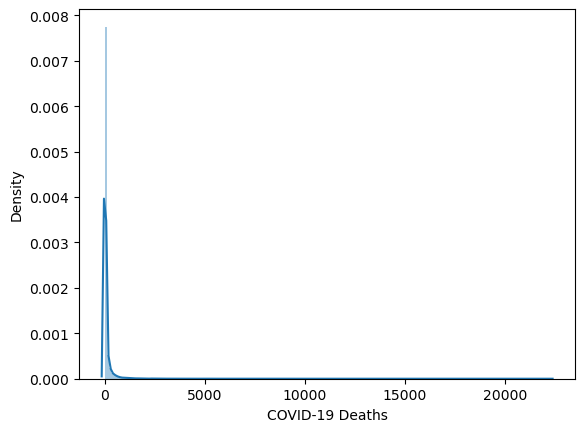

In [13]:
sns.distplot(df_covid_deaths['COVID-19 Deaths'], bins=200) # Shows extreme values

#### There are extreme values or outliers, but they are not true outliers because they are accurate death totals that need to be accounted for. We cannot remove these outliers without removing valuable information.

In [14]:
# filter out rows with "All Ages"
filtered_df_1 = df_covid_deaths.loc[df_covid_deaths['Age Group'] != 'All Ages']
# check the mean
filtered_df_1['COVID-19 Deaths'].mean()

46.67128801431127

In [15]:
# check the median of the filtered data
filtered_df_1['COVID-19 Deaths'].median()

4.0

In [16]:
# check the max of the filtered data
filtered_df_1['COVID-19 Deaths'].max()

6114

# 03. Data prep for regression analysis - Pneumonia vs. COVID

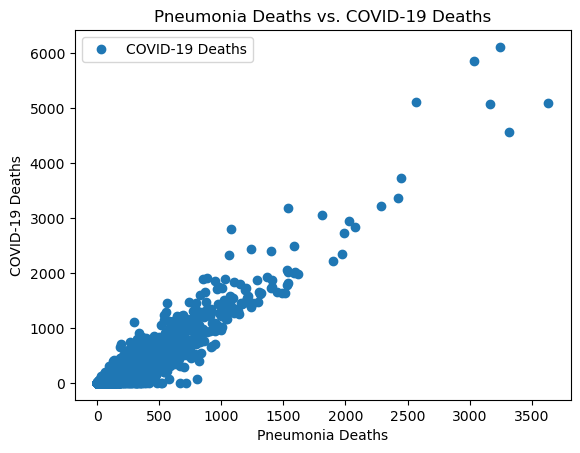

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
filtered_df_1.plot(x = 'Pneumonia Deaths', y='COVID-19 Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Pneumonia Deaths vs. COVID-19 Deaths')  
plt.xlabel('Pneumonia Deaths')  
plt.ylabel('COVID-19 Deaths')  
plt.show()

## HYPOTHESIS: If there are more pneumonia deaths, then there will be more COVID-19 deaths.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = filtered_df_1['Pneumonia Deaths'].values.reshape(-1,1)
y = filtered_df_1['COVID-19 Deaths'].values.reshape(-1,1)

In [19]:
X

array([[ 0],
       [ 4],
       [ 4],
       ...,
       [11],
       [26],
       [25]])

In [20]:
y

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]])

In [21]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression analysis - Pneumonia vs. COVID

In [40]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [41]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

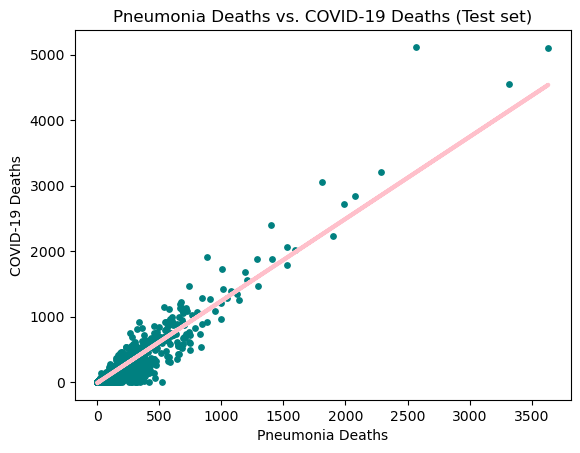

In [47]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt.figure()
plt.scatter(X_test, y_test, color='teal', s = 15)
plt.plot(X_test, y_predicted, color='pink', linewidth =3)
plt.title('Pneumonia Deaths vs. COVID-19 Deaths (Test set)')
plt.xlabel('Pneumonia Deaths')
plt.ylabel('COVID-19 Deaths')
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path = os.path.join(folder_path, 'linear_regression.png')
plt.savefig(output_file_path)
plt.show()

### While the points follow the general trend of this line, they are not all close to the line and some points are definitely further away. Removing these outliers though would not be ideal in this case because we know these death totals are accurate according to the CDC even if they are unexpectedly high at times.

In [38]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.25238724]]
Mean squared error:  3506.123586208828
R2 score:  0.8999278625255183


In [40]:
y_predicted

array([[ -7.09375498],
       [141.94032677],
       [ 81.82573917],
       ...,
       [ 25.4683133 ],
       [ -7.09375498],
       [  9.18727916]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,-7.093755
1,129,141.940327
2,107,81.825739
3,22,80.573352
4,0,-12.103304
5,4,-7.093755
6,0,-7.093755
7,4,-7.093755
8,4,-7.093755
9,4,56.777994


### Compare how the regression fits the training set

In [42]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.25238724]]
Mean squared error:  3862.7781545299395
R2 score:  0.8635512537983934


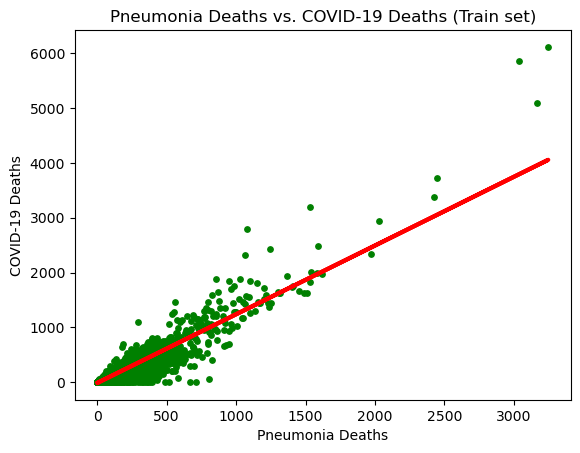

In [45]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt.figure()
plt.scatter(X_test, y_test, color='teal', s = 15)
plt.plot(X_test, y_predicted, color='pink', linewidth =3)
plt.title('Pneumonia Deaths vs. COVID-19 Deaths (Test set)')
plt.xlabel('Pneumonia Deaths')
plt.ylabel('COVID-19 Deaths')
folder_path = '/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project/04 Analysis/Visualizations'
output_file_path = os.path.join(folder_path, 'linear_regression.png')
plt.savefig(output_file_path)
plt.show()
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='teal', s = 15)
plot_test.plot(X_train, y_predicted_train, color='pink', linewidth =3)
plot_test.title('Pneumonia Deaths vs. COVID-19 Deaths (Train set)')
plot_test.xlabel('Pneumonia Deaths')
plot_test.ylabel('COVID-19 Deaths')
plot_test.show()

## The mean squared error (MSE) is quite large for both the test and training sets. This means that the regression line does not pass fairly close to the observations, making it not the best fit. The r-squared value however is close to 1, which indicates a good fit. Overall, the predictions aren't accurate but still serve as decent estimates.